In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets

In [2]:
sp500_hist = pd.read_csv(
    "./data/sp500_hist_prices.csv",
    parse_dates=['Date'],
    index_col='Date'
)

# drop columns with more than 60% NaN values
sp500_hist.dropna(axis=1, thresh=int(len(sp500_hist)*0.4), inplace=True)

# drop columns with negative values in it
sp500_hist.drop(
    columns=sp500_hist.columns[(sp500_hist < 0).any()].values, 
    axis=1,
    inplace=True)

print(f'Shape: {sp500_hist.shape}')
sp500_hist.head()

Shape: (4279, 484)


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,20.439508,35.305668,38.559849,2.272182,NaN,16.348289,12.590348,6.120000,21.528095,38.520000,...,29.771492,9.832613,32.591091,24.051765,NaN,12.118679,60.463249,42.830002,58.061222,NaN
2006-01-04,20.494427,36.955471,38.834522,2.278869,NaN,16.239967,12.609449,6.151111,21.645647,38.419998,...,29.716309,9.880271,32.646824,24.274343,NaN,12.222367,61.037167,42.410000,58.471172,NaN
2006-01-05,21.031340,37.436260,39.020573,2.260936,NaN,16.038809,12.771802,6.061111,21.807291,38.070000,...,29.539726,9.874971,32.485168,23.998352,NaN,12.743404,60.392624,42.529999,59.002590,NaN
2006-01-06,21.141167,36.766926,38.976273,2.319297,NaN,15.860854,13.016929,6.173333,22.887375,39.000000,...,29.821157,9.912039,33.126179,24.372272,NaN,12.707114,60.083572,44.119999,59.617485,NaN
2006-01-09,21.080151,36.399242,39.481319,2.311697,NaN,15.860854,13.500801,6.116667,22.821247,38.380001,...,31.228340,9.885561,33.109463,24.612658,NaN,12.805617,62.211487,44.790001,59.124062,NaN


In [3]:
sp500_hist.iloc[:,0]

Date
2006-01-03     20.439508
2006-01-04     20.494427
2006-01-05     21.031340
2006-01-06     21.141167
2006-01-09     21.080151
                 ...    
2022-12-23    148.765411
2022-12-27    149.084427
2022-12-28    147.628967
2022-12-29    150.619629
2022-12-30    149.406601
Name: A, Length: 4279, dtype: float64

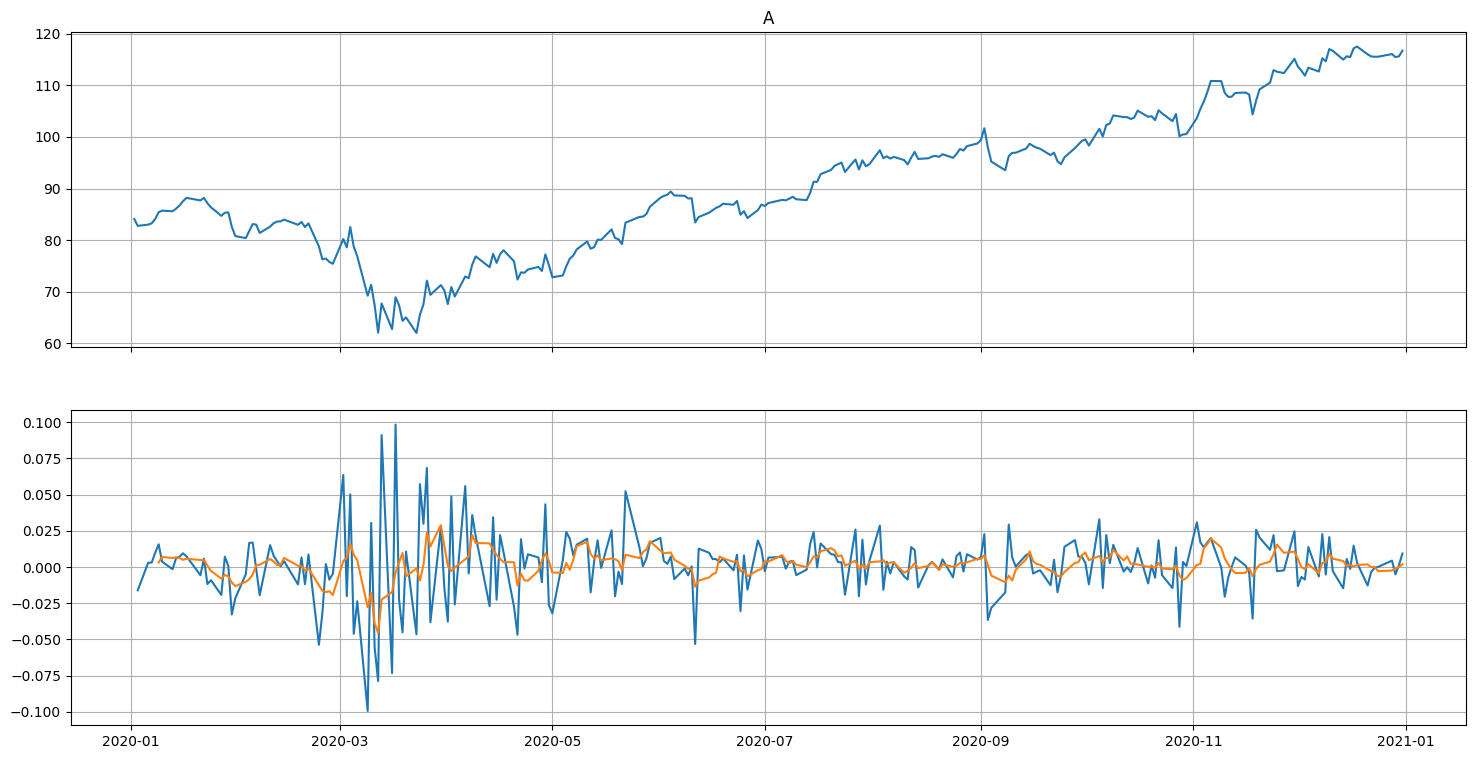

In [26]:
idx = 0
start = '2020-01-01'
end = '2021-01-01'
_, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(18, 9), sharex=True)
series = sp500_hist.loc[start:end,'A']
series_pct = series.pct_change()
series_pct_mean = series_pct.rolling(window=5).mean()

ax0.plot(series)
ax0.set_title(series.name)
# ax0.plot(series_pct - series_pct_mean)
ax0.grid()

ax1.plot(series_pct)
ax1.plot(series_pct_mean)
ax1.grid()
plt.show()

In [5]:
@widgets.interact(idx = (0,sp500_hist.shape[1]-1,1))
def f(idx):
    sp500_hist.iloc[:,idx].plot()
    plt.show()

interactive(children=(IntSlider(value=241, description='idx', max=483), Output()), _dom_classes=('widget-inter…